# 01. 데이터 수집 및 정제

In [2]:
import pandas as pd
import numpy as np
import os

In [14]:
import math
import re
import time
from datetime import datetime, date

import requests
from bs4 import BeautifulSoup
from selenium import webdriver

from IPython.display import Image
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from pykrx import stock
import FinanceDataReader as fdr
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import FinanceDataReader as fdr
import finterstellar as fs


import talib.abstract as ta
from talib import MA_Type


import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('max_colwidth', None)
plt.rcParams['font.family']

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


['Malgun Gothic']

In [1]:
import pandas as pd
import numpy as np
import os

filename=os.listdir('./datasets/체력측정및운동처방종합데이터/')[1:]
df_list=[]

for name in filename:
    df=pd.read_csv(f'./datasets/체력측정및운동처방종합데이터/{name}')
    df_list.append(df)


KeyboardInterrupt



In [39]:
df=pd.concat(df_list,axis=0)
df.columns=['회원일련번호값','측정일련번호','센터명','연령대구분명','측정장소구분명',
'측정연령수','입력구분명','인증구분명','측정일자','성별구분코드','신장(cm)','체중(kg)','체지방율(%)',
'허리둘레(cm)','이완기최저혈압(mmHg)','수축기최고혈압(mmHg)','악력_좌(kg)','악력_우(kg)',
'윗몸말아올리기(회)','반복점프(회)','앉아윗몸앞으로굽히기(cm)','일리노이(초)','체공시간(초)',
'협응력시간(초)','협응력실수횟수(회)','협응력계산결과값(초)','BMI(kg/㎡)','교차윗몸일으키기(회)',
'왕복오래달리기(회)','10M_4회_왕복달리기(초)','제자리멀리뛰기(cm)','의자에앉았다일어서기(회)',
'6분걷기(m)','2분제자리걷기(회)',' 의자에앉아_3M표적_돌아오기(초)','8자보행(초)','상대악력(%)','피부두겹합',
'왕복오래달리기출력(VO₂max)','트레드밀_안정시(bpm)','트레드밀_3분(bpm)','트레드밀_6분(bpm)','트레드밀_9분(bpm)',
'트레드밀출력(VO₂max)','스텝검사_회복시_심박수(bpm)','스텝검사출력(VO₂max)','허벅지_좌(cm)','허벅지_우(cm)','전신반응(초)',
'성인체공시간(초)','운동처방내용']

In [41]:
df=df.sort_values('측정일자')

In [42]:
# df.to_csv('./datasets/체력측정및운동처방종합데이터.csv',index=False)

In [3]:
df=pd.read_csv('./datasets/체력측정및운동처방종합데이터.csv')

In [7]:
df['측정일자']=df['측정일자'].astype('str')


<AxesSubplot: >

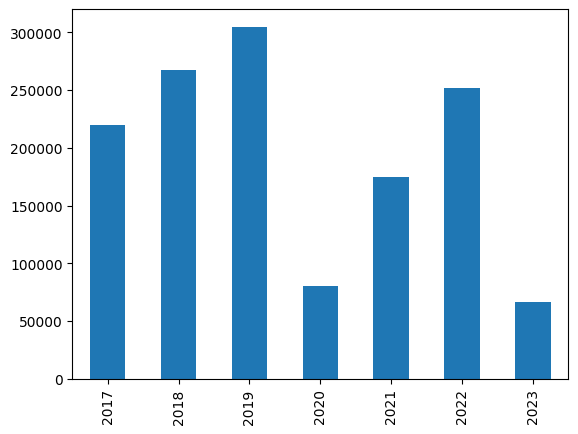

In [12]:
df['측정일자'].str[:4].value_counts().sort_index().plot(kind='bar')

In [44]:
df.isna().sum()[df.isna().sum()>0]

측정연령수                        7
인증구분명                        1
신장(cm)                     128
체중(kg)                     120
체지방율(%)                  48211
허리둘레(cm)                663528
이완기최저혈압(mmHg)            12349
수축기최고혈압(mmHg)            12361
악력_좌(kg)                  2555
악력_우(kg)                  2452
윗몸말아올리기(회)             1125057
반복점프(회)                1008302
앉아윗몸앞으로굽히기(cm)            4458
일리노이(초)                 826259
체공시간(초)                 828611
협응력시간(초)                836862
협응력실수횟수(회)              836953
협응력계산결과값(초)             836857
BMI(kg/㎡)                   19
교차윗몸일으키기(회)             800410
왕복오래달리기(회)              564138
10M_4회_왕복달리기(초)        1014348
제자리멀리뛰기(cm)             518334
의자에앉았다일어서기(회)          1183320
6분걷기(m)                1358300
2분제자리걷기(회)             1190842
 의자에앉아_3M표적_돌아오기(초)    1183304
8자보행(초)                1184414
상대악력(%)                   1164
피부두겹합                  1365398
왕복오래달리기출력(VO₂max)       603906
트레드밀_안정시(bpm)          1295769
트레드밀_3분(

In [16]:
dic={"연령":['20대','30대','40대','50대','60대'],"건강관리관심도":[62.6,69.1,64.7,73.0,73.6]}
temp=pd.DataFrame(dic)
temp

,연령,건강관리관심도
0,20대,62.6
1,30대,69.1
2,40대,64.7
3,50대,73.0
4,60대,73.6


<AxesSubplot: xlabel='연령', ylabel='건강관리관심도'>

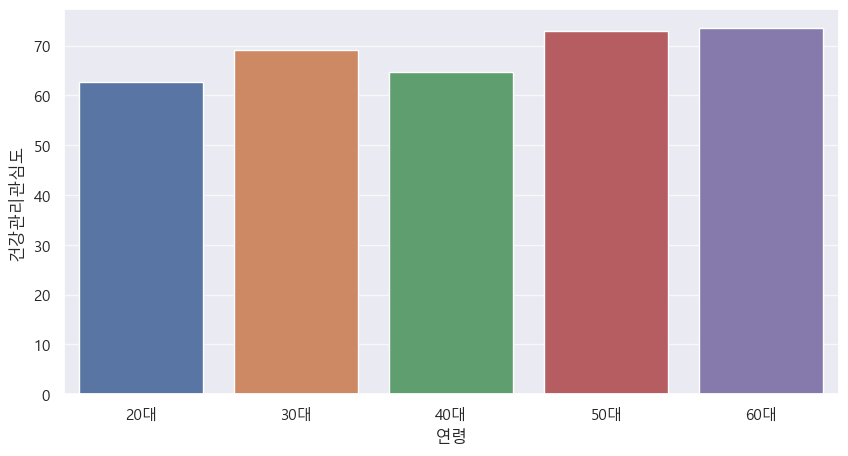

In [17]:
sns.barplot(data=temp,x='연령',y='건강관리관심도')